In [0]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [0]:
os.chdir(r'./drive/My Drive/ML_Code/Human Activity Recognition/HAR/')

In [3]:
dir_list = os.listdir()
print(dir_list)

['1.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv', 'README', 'model.png']


In [4]:
# Create new list of 15 datasets.
list_files = [i for i in dir_list if i[0].isdigit()]
trans_list = sorted([int(i.split('.')[0]) for i in list_files])
new_list = [str(i) + '.csv' for i in trans_list]
print(new_list)

['1.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv']


In [5]:
# Prepar2 data sets and visualizing all 15 data sets per activity.
dict_files = {}
column_names = ['number', 'x', 'y', 'z', 'activity']
for name in new_list:
    df = pd.read_csv(name, names = column_names, low_memory=False)
    dict_files[name] = df
print(dict_files['1.csv'])

          number     x     y     z  activity
0            0.0  1502  2215  2153         1
1            1.0  1667  2072  2047         1
2            2.0  1611  1957  1906         1
3            3.0  1601  1939  1831         1
4            4.0  1643  1965  1879         1
...          ...   ...   ...   ...       ...
162496  162500.0  1927  2388  2074         7
162497  162500.0  1930  2383  2074         7
162498  162500.0  1929  2385  2076         7
162499  162500.0  1926  2385  2078         7
162500  162500.0  1922  2387  2078         0

[162501 rows x 5 columns]


Subject # 1.csv


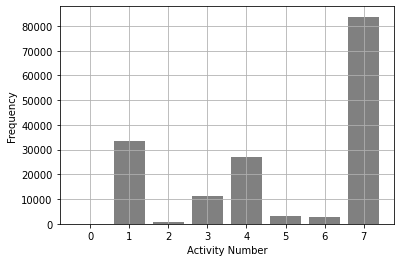

Subject # 2.csv


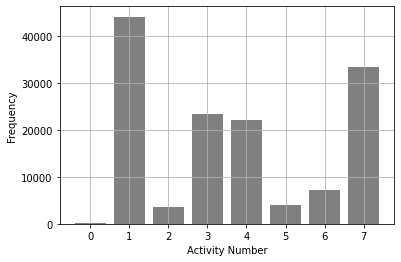

Subject # 3.csv


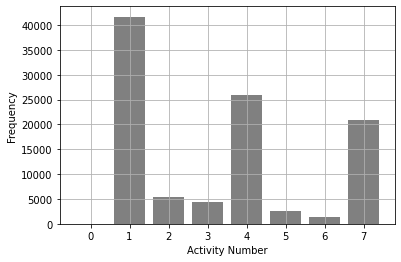

Subject # 4.csv


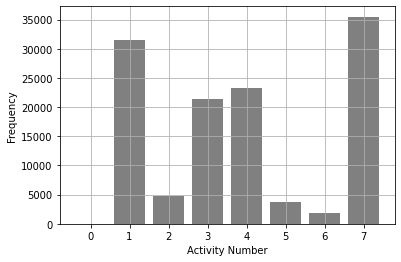

Subject # 5.csv


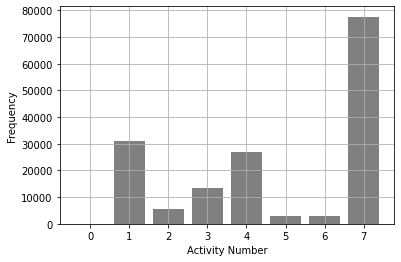

Subject # 6.csv


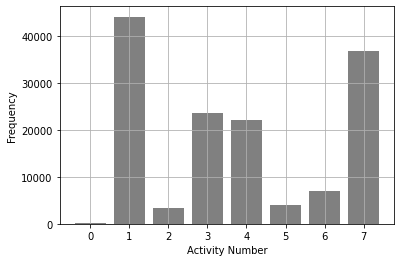

Subject # 7.csv


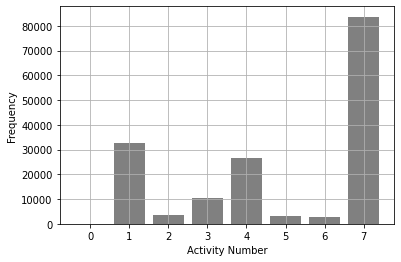

Subject # 8.csv


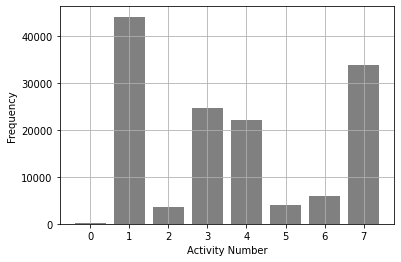

Subject # 9.csv


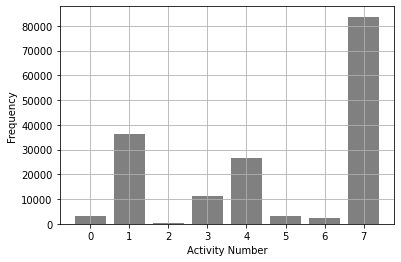

Subject # 10.csv


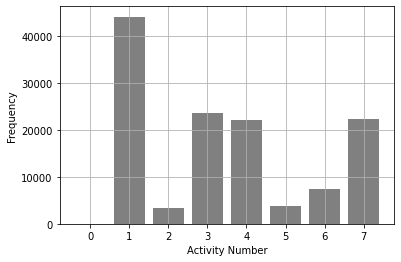

Subject # 11.csv


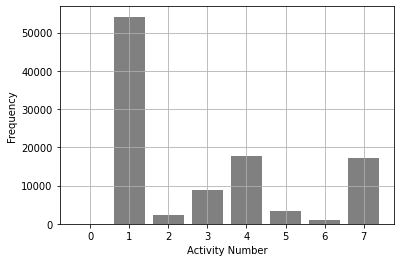

Subject # 12.csv


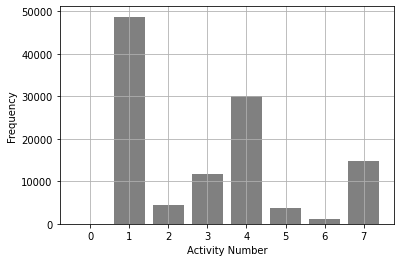

Subject # 13.csv


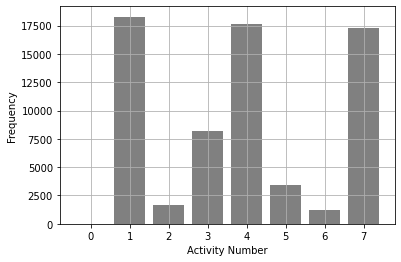

Subject # 14.csv


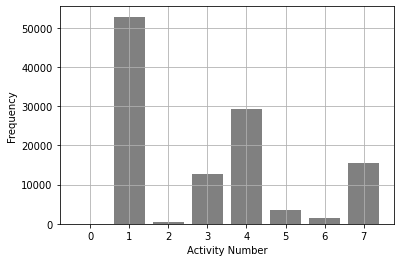

Subject # 15.csv


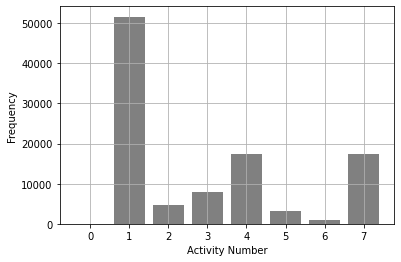

In [6]:
# Visualisation.
for file, data in dict_files.items():
    print("Subject #", file)
    activity_group = data.groupby('activity').size()
    plt.bar(activity_group.index, activity_group.values, color='gray')
    plt.ylabel('Frequency')
    plt.xlabel('Activity Number')
    plt.grid(True)
    plt.show()

In [7]:
# Prepare dataset.
all = []
labels = list(range(1,len(list_files)+1))   # [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
print(labels)
for index, item in enumerate(list_files):
    file_table = pd.read_csv(item, names = ['number', 'x', 'y','z','activity'], low_memory=False)
    sLength = file_table.shape[0]
    df = file_table.assign(label = pd.Series([labels[index]]*sLength))
    df_clear = df[df.activity != 0]
    all.append(df_clear)
print(all)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[          number     x     y     z  activity  label
0            0.0  1502  2215  2153         1      1
1            1.0  1667  2072  2047         1      1
2            2.0  1611  1957  1906         1      1
3            3.0  1601  1939  1831         1      1
4            4.0  1643  1965  1879         1      1
...          ...   ...   ...   ...       ...    ...
162495  162500.0  1926  2382  2072         7      1
162496  162500.0  1927  2388  2074         7      1
162497  162500.0  1930  2383  2074         7      1
162498  162500.0  1929  2385  2076         7      1
162499  162500.0  1926  2385  2078         7      1

[162500 rows x 6 columns],           number     x     y     z  activity  label
0            0.0  1984  1998  1645         1      2
1            1.0  1984  2003  1653         1      2
2            2.0  1987  2002  1648         1      2
3            3.0  1990  2001  1650         1      2
4            4.0  1992  2000  1657 

In [0]:
df_res = pd.concat(all)
data = df_res

In [9]:
data.head()

,number,x,y,z,activity,label
0,0.0,1502,2215,2153,1,1
1,1.0,1667,2072,2047,1,1
2,2.0,1611,1957,1906,1,1
3,3.0,1601,1939,1831,1,1
4,4.0,1643,1965,1879,1,1


In [10]:
data.tail()

,number,x,y,z,activity,label
103495,103500.0,2050,2523,1991,7,15
103496,103500.0,2043,2539,1990,7,15
103497,103500.0,2036,2508,1976,7,15
103498,103500.0,2025,2520,1991,7,15
103499,103500.0,2009,2546,2007,7,15


In [11]:
data.describe()

,number,x,y,z,activity,label
count,1.923177e+06,1.923177e+06,1.923177e+06,1.923177e+06,1.923177e+06,1.923177e+06
mean,6.715608e+04,1.987479e+03,2.382300e+03,1.970488e+03,3.890407e+00,7.511287e+00
std,4.148245e+04,1.113408e+02,1.002107e+02,9.449121e+01,2.439785e+00,4.175452e+00
min,0.000000e+00,2.820000e+02,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.205200e+04,1.904000e+03,2.337000e+03,1.918000e+03,1.000000e+00,4.000000e+00
50%,6.433400e+04,1.992000e+03,2.367000e+03,1.988000e+03,4.000000e+00,7.000000e+00
75%,9.844000e+04,2.076000e+03,2.412000e+03,2.032000e+03,7.000000e+00,1.100000e+01
max,1.667400e+05,3.828000e+03,4.095000e+03,4.095000e+03,7.000000e+00,1.500000e+01


In [0]:
from sklearn.preprocessing import StandardScaler
import random
df_train = data[data['label'] == 1]
df_test = data[data['label'] == 7]

train_data = df_train[['x','y','z']]
test_data = df_test[['x','y','z']]

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)

# Train the model on the 50000 samples and test it on 10000
train_split = random.choices(train_data_scaled, k=50000)
test_split = random.choices(test_data_scaled, k=10000)

In [13]:
%%time
from sklearn import svm
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(train_split)

pred_test = clf.predict(test_split)
n_error_test = pred_test[pred_test == -1].size
print ("Error rate on trainee 7 is {}".format(n_error_test/len(pred_test)))

Error rate on trainee 7 is 0.2576
CPU times: user 23.4 s, sys: 207 ms, total: 23.6 s
Wall time: 23.7 s


In [0]:
data_scaled = scaler.fit_transform(data[['x','y','z']])
data['x-scaled'] = data_scaled[:,0]
data['y-scaled'] = data_scaled[:,1]
data['z-scaled'] = data_scaled[:,2]

In [15]:
data.head()

,number,x,y,z,activity,label,x-scaled,y-scaled,z-scaled
0,0.0,1502,2215,2153,1,1,-4.360297,-1.669479,1.931520
1,1.0,1667,2072,2047,1,1,-2.878360,-3.096472,0.809722
2,2.0,1611,1957,1906,1,1,-3.381321,-4.244054,-0.682480
3,3.0,1601,1939,1831,1,1,-3.471135,-4.423675,-1.476205
4,4.0,1643,1965,1879,1,1,-3.093915,-4.164222,-0.968221


In [16]:
# Create train set by random choice (k = 50000).
df_train = data[data['label'] == 1].loc[:,'x-scaled':'z-scaled'].values
train_split = random.choices(df_train, k = 50000)

test_dict = {}
for i in range(1,16):
    df_test = random.choices(data[data['label'] == i][['x-scaled','y-scaled','z-scaled']].values, k = 10000)
    test_dict[i] = df_test
print (test_dict) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
# Run OneClassSVM per each testee.
from time import time
t0 = time()
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(df_train)
for key, value in test_dict.items():
    pred = clf.predict(value)
    n_error_test = pred[pred == -1].size
    print ("The {} testee has error rate {}".format(key, n_error_test/len(pred) * 100))
print ("time on training and prediction:", round(time()-t0, 3), "s")  

The 1 testee has error rate 9.68
The 2 testee has error rate 99.77000000000001
The 3 testee has error rate 92.85
The 4 testee has error rate 91.71000000000001
The 5 testee has error rate 57.28
The 6 testee has error rate 99.03999999999999
The 7 testee has error rate 99.98
The 8 testee has error rate 88.64
The 9 testee has error rate 99.91
The 10 testee has error rate 99.95
The 11 testee has error rate 59.98
The 12 testee has error rate 62.849999999999994
The 13 testee has error rate 82.38
The 14 testee has error rate 37.22
The 15 testee has error rate 99.72
time on training and prediction: 312.402 s


In [18]:
# Features and labels extraction from scaled data
features = data[['x-scaled','y-scaled','z-scaled']]
labels = data['label']
print(len(features), len(labels))

1923177 1923177


In [19]:
from sklearn.model_selection import train_test_split
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1346223, 3) (576954, 3) (1346223,) (576954,)


In [0]:
from sklearn.metrics import accuracy_score
def scoring(X,pred):
    result = 'Accuracy score is {0:.2f}%'.format(accuracy_score(X, pred)*100) 
    return result

In [21]:
from time import time
from sklearn.naive_bayes import GaussianNB
t0 = time()
clf = GaussianNB()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print ("time on training and prediction:", round(time()-t0, 3), "s")  
print (scoring(prediction, y_test))

time on training and prediction: 0.658 s
Accuracy score is 49.76%


In [22]:
from sklearn.svm import SVC
t0 = time()
clf = SVC()
clf.fit(X_train[:30000],y_train[:30000])
prediction = clf.predict(X_test[:10000])
print ("time on training and prediction:", round(time()-t0, 3), "s")  
print (scoring(prediction, y_test[:10000]))

time on training and prediction: 18.146 s
Accuracy score is 72.36%


In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000, 10000], 'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001]}
t0 = time()
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameters, n_jobs=-1)
clf.fit(X_train[:1000],y_train[:1000]) 
print ("time on parameters selection:", round(time()-t0, 3), "s")  
print('Best score for data1:', clf.best_score_) 
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

time on parameters selection: 245.289 s
Best score for data1: 0.681
Best C: 10000
Best Kernel: rbf
Best Gamma: 0.1


In [24]:
from sklearn import tree
t0 = time()
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print (scoring(prediction, y_test))
print ("time on training and prediction:", round(time()-t0, 3), "s")  

Accuracy score is 73.23%
time on training and prediction: 9.077 s


In [25]:
from xgboost import XGBClassifier
t0 = time()
model = XGBClassifier()
model.fit(X_train[:2000], y_train[:2000])
print (model)
pred = model.predict(X_test[:500])
print ("time on training and prediction:", round(time()-t0, 3), "s")
print (scoring(pred, y_test[:500]))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
time on training and prediction: 0.976 s
Accuracy score is 70.00%


In [26]:
#XGBoost-best params
import warnings
from sklearn.model_selection import RandomizedSearchCV
warnings.simplefilter('ignore', DeprecationWarning)
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,
                                    estimator = gbm, scoring = "accuracy",
                                    verbose = 1, n_iter = 50, cv = 4)

# Fit randomized_mse to the data
xgb_random.fit(X_train[:10000], y_train[:10000])

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.8min finished


Best parameters found:  {'n_estimators': 17, 'max_depth': 7, 'learning_rate': 0.55, 'colsample_bytree': 1}
Best accuracy found:  0.7613000000000001


In [27]:
data.head()

,number,x,y,z,activity,label,x-scaled,y-scaled,z-scaled
0,0.0,1502,2215,2153,1,1,-4.360297,-1.669479,1.931520
1,1.0,1667,2072,2047,1,1,-2.878360,-3.096472,0.809722
2,2.0,1611,1957,1906,1,1,-3.381321,-4.244054,-0.682480
3,3.0,1601,1939,1831,1,1,-3.471135,-4.423675,-1.476205
4,4.0,1643,1965,1879,1,1,-3.093915,-4.164222,-0.968221


In [28]:
# Create n-feature from x,y,z features as additional column.
data['N-feature'] = ((data['x-scaled']**2 + data['y-scaled']**2 + data['z-scaled']**2) / 3)**0.5
data['N-feature'][:4]

0    2.917197
1    2.485206
2    3.157589
3    3.356430
Name: N-feature, dtype: float64

In [29]:
data.head()

,number,x,y,z,activity,label,x-scaled,y-scaled,z-scaled,N-feature
0,0.0,1502,2215,2153,1,1,-4.360297,-1.669479,1.931520,2.917197
1,1.0,1667,2072,2047,1,1,-2.878360,-3.096472,0.809722,2.485206
2,2.0,1611,1957,1906,1,1,-3.381321,-4.244054,-0.682480,3.157589
3,3.0,1601,1939,1831,1,1,-3.471135,-4.423675,-1.476205,3.356430
4,4.0,1643,1965,1879,1,1,-3.093915,-4.164222,-0.968221,3.046884


In [30]:
features = data['N-feature']
labels = data['label']

# Split the dataset into the training set and test subsets.
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(features, labels, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1346223, 3) (576954, 3) (1346223,) (576954,)


In [31]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
#MLP for binary classification
t0 = time()
model = Sequential()
model.add(Dense(32, input_dim=1, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train_N[:200000], y_train_N[:200000],
          epochs=10,
          batch_size=128)
score = model.evaluate(X_test_N[:50000], y_test_N[:50000], batch_size=128)
print (score)
print ("time on training and scoring:", round(time()-t0, 3), "s")

Using TensorFlow backend.


Epoch 1/10
200000/200000 [==============================] - 3s 13us/step - loss: -3083.6764 - accuracy: 0.0836
Epoch 2/10
200000/200000 [==============================] - 2s 11us/step - loss: -39882.2035 - accuracy: 0.0838
Epoch 3/10
200000/200000 [==============================] - 2s 11us/step - loss: -165271.6754 - accuracy: 0.0838
Epoch 4/10
200000/200000 [==============================] - 2s 11us/step - loss: -436652.7599 - accuracy: 0.0838
Epoch 5/10
200000/200000 [==============================] - 2s 12us/step - loss: -914868.2106 - accuracy: 0.0838
Epoch 6/10
200000/200000 [==============================] - 2s 11us/step - loss: -1656559.1082 - accuracy: 0.0838
Epoch 7/10
200000/200000 [==============================] - 2s 11us/step - loss: -2716687.2599 - accuracy: 0.0838
Epoch 8/10
200000/200000 [==============================] - 2s 11us/step - loss: -4168031.7736 - accuracy: 0.0838
Epoch 9/10
200000/200000 [==============================] - 2s 11us/step - loss: -6030858.4782 -

In [32]:
#Sequence classification with LSTM
max_features = 100
t0 = time()
model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train_N[:20000], y_train_N[:20000], batch_size=16, epochs=10)
score = model.evaluate(X_test_N[:5000], y_test_N[:5000], batch_size=16)
print (score)
print ("time on training and scoring:", round(time()-t0, 3), "s")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
20000/20000 [==============================] - 7s 367us/step - loss: -464.9220 - accuracy: 0.0830
Epoch 2/10
20000/20000 [==============================] - 7s 368us/step - loss: -1226.6893 - accuracy: 0.0830
Epoch 3/10
20000/20000 [==============================] - 11s 564us/step - loss: -1984.0065 - accuracy: 0.0830
Epoch 4/10
20000/20000 [==============================] - 8s 379us/step - loss: -2743.4629 - accuracy: 0.0830
Epoch 5/10
20000/20000 [==============================] - 7s 350us/step - loss: -3498.6334 - accuracy: 0.0830
Epoch 6/10
20000/20000 [==============================] - 7s 357us/step - loss: -4262.4940 - accuracy: 0.0830
Epoch 7/10
20000/20000 [==============================] - 7s 355us/step - loss: -5013.1916 - accuracy: 0.0830
Epoch 8/10
20000/20000 [==============================] - 8s 383us/step - loss: -5777.7849 - accuracy: 0.0830
Epoch 9/10
20000/20000 [==============================] - 7s 370us/step - loss: -6535.6125 - accuracy: 0.0830
Epoch 10/1

In [33]:
from keras.optimizers import SGD

t0 = time()
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 1-dimensional vector.
model.add(Dense(64, activation='relu', input_dim=1))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train_N[:200000], y_train_N[:200000],
          epochs=10,
          batch_size=128)
score = model.evaluate(X_test_N[:50000], y_test_N[:50000], batch_size=128)
print (score)
print ("time on training and scoring:", round(time()-t0, 3), "s")

Epoch 1/10
200000/200000 [==============================] - 3s 14us/step - loss: -99.8358 - accuracy: 0.0838
Epoch 2/10
200000/200000 [==============================] - 3s 14us/step - loss: -99.8358 - accuracy: 0.0838
Epoch 3/10
200000/200000 [==============================] - 3s 14us/step - loss: -99.8358 - accuracy: 0.0838
Epoch 4/10
200000/200000 [==============================] - 3s 14us/step - loss: -99.8358 - accuracy: 0.0838
Epoch 5/10
200000/200000 [==============================] - 3s 14us/step - loss: -99.8358 - accuracy: 0.0838
Epoch 6/10
200000/200000 [==============================] - 3s 14us/step - loss: -99.8358 - accuracy: 0.0838
Epoch 7/10
200000/200000 [==============================] - 3s 14us/step - loss: -99.8358 - accuracy: 0.0838
Epoch 8/10
200000/200000 [==============================] - 3s 14us/step - loss: -99.8358 - accuracy: 0.0838
Epoch 9/10
200000/200000 [==============================] - 3s 14us/step - loss: -99.8358 - accuracy: 0.0838
Epoch 10/10
50000/5

In [34]:
data.head()

,number,x,y,z,activity,label,x-scaled,y-scaled,z-scaled,N-feature
0,0.0,1502,2215,2153,1,1,-4.360297,-1.669479,1.931520,2.917197
1,1.0,1667,2072,2047,1,1,-2.878360,-3.096472,0.809722,2.485206
2,2.0,1611,1957,1906,1,1,-3.381321,-4.244054,-0.682480,3.157589
3,3.0,1601,1939,1831,1,1,-3.471135,-4.423675,-1.476205,3.356430
4,4.0,1643,1965,1879,1,1,-3.093915,-4.164222,-0.968221,3.046884


In [35]:
# Create frame for activity #7 and groupping it by testees
df = data[['x-scaled', 'y-scaled', 'z-scaled', 'activity', 'label']]
data_act_1 = df[df['activity'] == 7]
data_group = data_act_1.groupby('label').size()
print (data_group)

label
1     83748
2     33431
3     20940
4     35490
5     77600
6     36711
7     83701
8     33750
9     83660
10    22231
11    17151
12    14901
13    17249
14    15500
15    17500
dtype: int64


In [36]:
data.head()

,number,x,y,z,activity,label,x-scaled,y-scaled,z-scaled,N-feature
0,0.0,1502,2215,2153,1,1,-4.360297,-1.669479,1.931520,2.917197
1,1.0,1667,2072,2047,1,1,-2.878360,-3.096472,0.809722,2.485206
2,2.0,1611,1957,1906,1,1,-3.381321,-4.244054,-0.682480,3.157589
3,3.0,1601,1939,1831,1,1,-3.471135,-4.423675,-1.476205,3.356430
4,4.0,1643,1965,1879,1,1,-3.093915,-4.164222,-0.968221,3.046884


In [37]:
features = data_act_1[['x-scaled','y-scaled','z-scaled']]
labels = data_act_1['label']

# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(415494, 3) (178069, 3) (415494,) (178069,)


In [38]:
t0 = time()
clf = GaussianNB()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print ("time on training and prediction:", round(time()-t0, 3), "s")  
print (scoring(prediction, y_test))

time on training and prediction: 0.186 s
Accuracy score is 90.01%


In [39]:
t0 = time()
clf = SVC()
clf.fit(X_train[:30000],y_train[:30000])
prediction = clf.predict(X_test[:10000])
print ("time on training and prediction:", round(time()-t0, 3), "s")  
print (scoring(prediction, y_test[:10000]))

time on training and prediction: 5.404 s
Accuracy score is 92.78%


In [40]:
t0 = time()
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print (scoring(prediction, y_test))
print ("time on training and prediction:", round(time()-t0, 3), "s")  

Accuracy score is 90.22%
time on training and prediction: 1.894 s


In [41]:
t0 = time()
model = XGBClassifier()
model.fit(X_train[:20000], y_train[:20000])
print (model)
pred = model.predict(X_test[:5000])
print ("time on training and prediction:", round(time()-t0, 3), "s")
print (scoring(pred, y_test[:5000]))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
time on training and prediction: 6.969 s
Accuracy score is 92.46%


In [42]:
from sklearn.neighbors import KNeighborsClassifier
t0 = time()
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print (scoring(prediction, y_test))
print ("time on training and prediction:", round(time()-t0, 3), "s")

Accuracy score is 93.09%
time on training and prediction: 6.539 s


In [43]:
from sklearn.ensemble import RandomForestClassifier
t0 = time()
clf = RandomForestClassifier(max_depth=14, random_state=10)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print (scoring(prediction, y_test))
print ("time on training and prediction:", round(time()-t0, 3), "s")  

Accuracy score is 93.57%
time on training and prediction: 43.978 s


In [44]:
from sklearn.ensemble import AdaBoostClassifier
t0 = time()
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=5, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print (scoring(prediction, y_test))
print ("time on training and prediction:", round(time()-t0, 3), "s")  

Accuracy score is 93.15%
time on training and prediction: 417.644 s
